# 회귀모델 딥러닝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split 

In [5]:
df = pd.read_csv('../data/housing.csv',header = None, delim_whitespace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
# array로 변환
y = df.values[:,13]
x= df.values[:,0:13]

In [7]:
y # y값이 연속이므로 회귀모델 사용(regression)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=111)

In [9]:
x_train.shape

(379, 13)

In [10]:
# 모델 생성: activation 함수가 다름

model  = Sequential()
model.add(Dense(30,input_dim=13,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

# binary classification activation: sigmoid()
# multi classification : softmax()

model.add(Dense(1)) # 나오는 값 1 , linear-regression에선 output layer activaiton function 사용하지 않는다



In [ ]:
# activation function(활성함수)
# https://89douner.tistory.com/22

![](https://machinelearningmastery.com/wp-content/uploads/2020/12/How-to-Choose-an-Output-Layer-Activation-Function.png)

In [17]:
# compile : loss 함수가 다름

# binary classification -> binary_crossentropy
# multi clasificaiton -> categorical_crossentropy

model.compile(loss= 'mean_squared_error',optimizer= 'adam') # 회귀의 경우 loss 함수를 'MSE'사용



In [24]:
hist = model.fit(x_train, y_train, validation_split=0.2 , epochs=200, batch_size =20)

Epoch 1/200
16/16 [==============================] - 0s 8ms/step - loss: 16.3718 - val_loss: 21.3812
Epoch 2/200
16/16 [==============================] - 0s 8ms/step - loss: 25.8899 - val_loss: 28.3464
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 20.0731 - val_loss: 22.9323
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 17.7179 - val_loss: 20.0757
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 16.6210 - val_loss: 28.5020
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 31.9463 - val_loss: 29.3541
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 21.5478 - val_loss: 26.2989
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 18.3222 - val_loss: 19.7597
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 17.0831 - val_loss: 23.4162
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss: 16.0208 - val_los

Epoch 161/200
16/16 [==============================] - 0s 5ms/step - loss: 12.9563 - val_loss: 21.6531
Epoch 162/200
16/16 [==============================] - 0s 5ms/step - loss: 12.3750 - val_loss: 18.8088
Epoch 163/200
16/16 [==============================] - 0s 5ms/step - loss: 12.4875 - val_loss: 19.2879
Epoch 164/200
16/16 [==============================] - 0s 5ms/step - loss: 13.5093 - val_loss: 19.1792
Epoch 165/200
16/16 [==============================] - 0s 5ms/step - loss: 12.2499 - val_loss: 22.6203
Epoch 166/200
16/16 [==============================] - 0s 5ms/step - loss: 12.8914 - val_loss: 19.3608
Epoch 167/200
16/16 [==============================] - 0s 5ms/step - loss: 12.4452 - val_loss: 22.2726
Epoch 168/200
16/16 [==============================] - 0s 5ms/step - loss: 12.8150 - val_loss: 18.8712
Epoch 169/200
16/16 [==============================] - 0s 5ms/step - loss: 13.5561 - val_loss: 22.7932
Epoch 170/200
16/16 [==============================] - 0s 5ms/step - loss

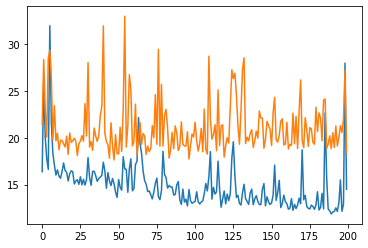

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [27]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 17.8390


17.838998794555664

In [ ]:
# 학습이 잘 안되어 scaler사용

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [29]:
# 모델생성
model  = Sequential()
model.add(Dense(30,input_dim=13,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1) )
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [30]:
# x_train -> x-train_test
hist = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs= 200, batch_size =20)

Epoch 1/200
16/16 [==============================] - 0s 11ms/step - loss: 562.1448 - val_loss: 606.2778
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 549.6158 - val_loss: 587.9254
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 528.2942 - val_loss: 557.6478
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 489.7369 - val_loss: 497.1400
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 418.6588 - val_loss: 403.0531
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 318.6263 - val_loss: 280.3162
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 211.1551 - val_loss: 180.5634
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 150.0998 - val_loss: 146.2324
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 132.6284 - val_loss: 133.6989
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss

Epoch 161/200
16/16 [==============================] - 0s 5ms/step - loss: 13.3542 - val_loss: 28.9997
Epoch 162/200
16/16 [==============================] - 0s 5ms/step - loss: 14.0495 - val_loss: 29.4341
Epoch 163/200
16/16 [==============================] - 0s 5ms/step - loss: 13.3284 - val_loss: 29.2835
Epoch 164/200
16/16 [==============================] - 0s 5ms/step - loss: 13.2135 - val_loss: 28.9181
Epoch 165/200
16/16 [==============================] - 0s 5ms/step - loss: 13.3252 - val_loss: 28.8157
Epoch 166/200
16/16 [==============================] - 0s 6ms/step - loss: 13.2296 - val_loss: 28.7998
Epoch 167/200
16/16 [==============================] - 0s 4ms/step - loss: 13.5112 - val_loss: 29.2675
Epoch 168/200
16/16 [==============================] - 0s 5ms/step - loss: 13.5187 - val_loss: 28.8956
Epoch 169/200
16/16 [==============================] - 0s 5ms/step - loss: 13.0932 - val_loss: 28.8959
Epoch 170/200
16/16 [==============================] - 0s 5ms/step - loss

In [31]:
model.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 12.2922


12.292158126831055

In [32]:
# prediction

In [33]:
preds = model.predict(x_test_scaled)

In [34]:
# evaluation

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,preds)

0.8762392735300508

In [37]:
for i in range(10):
    pred_price = preds[i]
    real_price = y_test[i]
    print("{} - {}".format(round(real_price),round(pred_price[0])))
    

25 - 27
30 - 28
31 - 30
20 - 20
48 - 45
22 - 26
35 - 36
16 - 17
23 - 22
10 - 13


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=111)

In [12]:
# 모델 생성: activation 함수가 다름

model  = Sequential()
model.add(Dense(30,input_dim=13,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

# binary classification activation: sigmoid()
# multi classification : softmax()

model.add(Dense(1,activation='linear')) # 나오는 값 1 , linear-regression에선 output layer activaiton function 사용하지 않는다



In [13]:
model.compile(loss= 'mean_squared_error',optimizer= 'adam')

In [14]:
hist = model.fit(x_train, y_train, validation_split=0.2 , epochs=200, batch_size =20)

Epoch 1/200
16/16 [==============================] - 1s 12ms/step - loss: 2659.3784 - val_loss: 1407.0785
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 885.0736 - val_loss: 476.4267
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 277.5217 - val_loss: 187.1161
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 135.8969 - val_loss: 114.1488
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 97.3676 - val_loss: 90.0903
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 80.8051 - val_loss: 80.9112
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 73.3401 - val_loss: 72.7507
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 67.5344 - val_loss: 68.9382
Epoch 9/200
16/16 [==============================] - 0s 4ms/step - loss: 64.5166 - val_loss: 65.9566
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss: 62.024

16/16 [==============================] - 0s 5ms/step - loss: 33.1177 - val_loss: 36.2765
Epoch 82/200
16/16 [==============================] - 0s 5ms/step - loss: 31.8363 - val_loss: 39.9575
Epoch 83/200
16/16 [==============================] - 0s 5ms/step - loss: 31.8492 - val_loss: 35.7655
Epoch 84/200
16/16 [==============================] - 0s 4ms/step - loss: 32.1917 - val_loss: 37.1601
Epoch 85/200
16/16 [==============================] - 0s 5ms/step - loss: 30.8343 - val_loss: 34.5866
Epoch 86/200
16/16 [==============================] - 0s 5ms/step - loss: 31.6671 - val_loss: 40.3182
Epoch 87/200
16/16 [==============================] - 0s 5ms/step - loss: 30.1653 - val_loss: 37.2406
Epoch 88/200
16/16 [==============================] - 0s 4ms/step - loss: 31.1879 - val_loss: 35.6262
Epoch 89/200
16/16 [==============================] - 0s 4ms/step - loss: 31.6796 - val_loss: 33.4687
Epoch 90/200
16/16 [==============================] - 0s 4ms/step - loss: 29.9150 - val_loss: 3

Epoch 161/200
16/16 [==============================] - 0s 5ms/step - loss: 15.4243 - val_loss: 22.8411
Epoch 162/200
16/16 [==============================] - 0s 4ms/step - loss: 15.6938 - val_loss: 23.3389
Epoch 163/200
16/16 [==============================] - 0s 5ms/step - loss: 15.4975 - val_loss: 30.3197
Epoch 164/200
16/16 [==============================] - 0s 4ms/step - loss: 16.3092 - val_loss: 23.2566
Epoch 165/200
16/16 [==============================] - 0s 5ms/step - loss: 16.6342 - val_loss: 26.2787
Epoch 166/200
16/16 [==============================] - 0s 5ms/step - loss: 15.8059 - val_loss: 22.9363
Epoch 167/200
16/16 [==============================] - 0s 5ms/step - loss: 16.0438 - val_loss: 22.4811
Epoch 168/200
16/16 [==============================] - 0s 5ms/step - loss: 14.9612 - val_loss: 24.7820
Epoch 169/200
16/16 [==============================] - 0s 4ms/step - loss: 15.6418 - val_loss: 24.2821
Epoch 170/200
16/16 [==============================] - 0s 5ms/step - loss

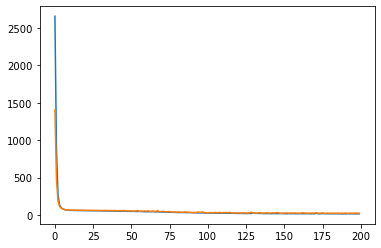

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])